c:\users\yoshi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\yoshi\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12384 missing from current font.
  font.set_text(s

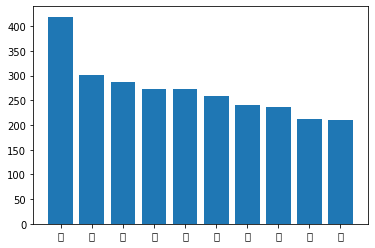

In [3]:
from  collections import Counter
import MeCab 
import matplotlib.pyplot as plt 

with open("neko.txt","r",encoding="utf-8") as mecab_file:
    a=mecab_file.read()
    mecab=MeCab.Tagger()
with open("neko2.txt.mecab","w",encoding="utf-8") as mecab_file2:
    mecab_file2.write(mecab.parse(a))

with open("neko2.txt.mecab","r",encoding="utf-8") as me_file:
    keitaiso=[]
    kyoki=[]
    words=[]
    freqs=[]
    sent=[]
    for line in me_file:
        line=line.strip("\n")
        line=line.replace(",","\t")
        items=line.split("\t")
        
        if items[0]=="EOS":
            break;
            
        keys={
            "surface":str(items[0]),
            "base":str(items[len(items)-3]),
            "pos":str(items[1]),
            "pos1":str(items[2]),
        }
        sent.append(keys)
        if items[0]=="。":
            keitaiso.append(sent)
            sent=[]    
    for line in keitaiso:    
        for i in range(0,len(line)):
            if line[i]["surface"]=="猫":
                for i2 in range(i,-1,-1):
                    if line[i2]["surface"]=="。" or line[i2]["surface"]=="\u3000":
                        kaishi=i2
                        break
                for i3 in range(i,len(line)):
                    if line[i3]["surface"]=="。":
                        end=i3
                        i=end
                        break
                for k in range(kaishi+1,end):
                    kyoki.append(line[k]["base"])
    freq=Counter(kyoki)
    kyoki_f=sorted(freq.items(),key=lambda x:x[1],reverse=True)
    for i in range(0,10):
        words.append(kyoki_f[i][0])
        freqs.append(kyoki_f[i][1])
    plt.bar(words,freqs)